In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/t

In [2]:
base = pd.read_csv('petr4_treinamento.csv')
base.dropna(inplace=True)
base 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [3]:
base_treinamento = base[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
base_treinamento

,Open,High,Low,Close,Adj Close,Volume
0,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...
1240,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [41]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [17]:
previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0:6])
    preco_real.append(base_treinamento_normalizada[i, 3])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores.shape

(1152, 90, 6)

In [7]:
regressor = Sequential()

regressor.add(LSTM(
    units=100,
    return_sequences=True,
    input_shape = (previsores.shape[1], previsores.shape[2])
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50,
    return_sequences=True
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50,
    return_sequences=True
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50
))
regressor.add(Dropout(0.3))

regressor.add(Dense(
    units=1,
    activation='sigmoid'
))

regressor.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau( monitor='loss', factor=0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='pesos.h5', monitor='loss', save_best_only=True, verbose=1)

regressor.fit(previsores, preco_real, epochs=100, batch_size=32, callbacks=[es, rlr, mcp])

2022-05-29 16:00:31.729742: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-05-29 16:00:31.753107: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999965000 Hz
2022-05-29 16:00:31.754610: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55dc0aa363b0 executing computations on platform Host. Devices:
2022-05-29 16:00:31.754717: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-05-29 16:00:31.759720: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-29 16:00:31.759764: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-29 16:00:31.759806: I tensorflow/stream_executor/cuda/cuda_

2022-05-29 16:00:31.960415: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


Epoch 1/100
1152/1152 [==============================] - 5s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.1029

Epoch 00001: loss improved from inf to 0.01809, saving model to pesos.h5
Epoch 2/100
1152/1152 [==============================] - 4s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0586

Epoch 00002: loss improved from 0.01809 to 0.00573, saving model to pesos.h5
Epoch 3/100
1152/1152 [==============================] - 4s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0516

Epoch 00003: loss improved from 0.00573 to 0.00439, saving model to pesos.h5
Epoch 4/100
1152/1152 [==============================] - 4s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0522

Epoch 00004: loss did not improve from 0.00439
Epoch 5/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0531

Epoch 00005: loss did not improve from 0.00439
Epoch 6/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0038 - mean_absolute_erro

1152/1152 [==============================] - 5s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0314

Epoch 00045: loss did not improve from 0.00155
Epoch 00045: early stopping


In [8]:
base_teste = pd.read_csv('petr4_teste.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [11]:
preco_real_teste = base_teste['Close']

frames = [base, base_teste]
base_completa = pd.concat(frames, ignore_index=True)
base_completa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1259,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
1260,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
1261,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
1262,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [12]:
base_completa.drop(columns='Date', inplace=True)
base_completa

,Open,High,Low,Close,Adj Close,Volume
0,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...
1259,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
1260,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
1261,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
1262,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [33]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.transform(entradas)
entradas.shape

/home/cassius/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


(112, 6)

In [37]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i,0:6])
X_teste = np.array(X_teste)
X_teste.shape

(22, 90, 6)

In [39]:
previsoes = regressor.predict(X_teste)
# previsoes = normalizador.inverse_transform(previsoes)
previsoes

array([[0.59195256],
       [0.5959759 ],
       [0.60073566],
       [0.60701704],
       [0.613887  ],
       [0.62059   ],
       [0.6267238 ],
       [0.63062465],
       [0.63299936],
       [0.6352155 ],
       [0.638219  ],
       [0.64326   ],
       [0.65318817],
       [0.66715217],
       [0.68121016],
       [0.69212526],
       [0.6975709 ],
       [0.702455  ],
       [0.71034366],
       [0.7234013 ],
       [0.7389034 ],
       [0.7505657 ]], dtype=float32)

In [49]:
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento['Close'].values.reshape(-1,1))

array([[0.76080559],
       [0.79567784],
       [0.79715132],
       ...,
       [0.58202356],
       [0.5844794 ],
       [0.5844794 ]])

In [50]:
previsoes = normalizador_previsao.inverse_transform(previsoes)
previsoes

array([[16.252153],
       [16.334068],
       [16.430977],
       [16.558867],
       [16.698738],
       [16.83521 ],
       [16.960096],
       [17.039516],
       [17.087866],
       [17.132988],
       [17.194138],
       [17.296774],
       [17.49891 ],
       [17.783218],
       [18.069439],
       [18.29167 ],
       [18.402544],
       [18.501984],
       [18.662596],
       [18.92845 ],
       [19.244072],
       [19.481518]], dtype=float32)

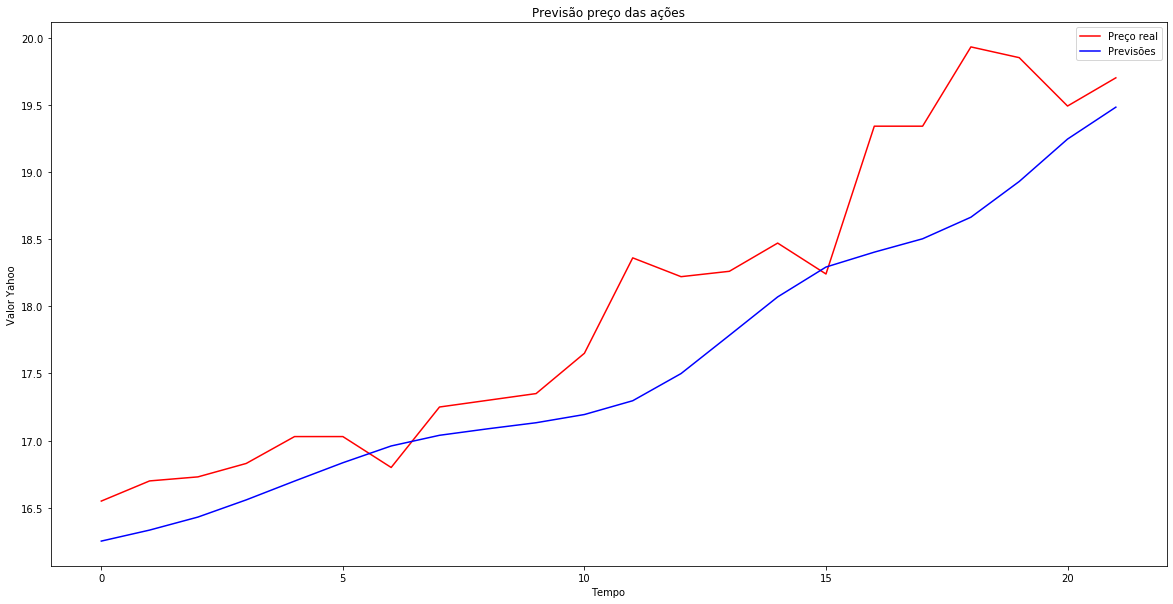

In [51]:
plt.figure(figsize=(20,10))
plt.plot(preco_real_teste, color='red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()